# Create image out of Circles

## Integrantes

0226594 Sara Carolina Gomez Delgado
0224969 Luis Eduardo Robles Jimenez

## Util

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def objective_function(vec,out, img):
    shapes, t = np.copy(out), np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)
    return np.sum(np.abs(np.subtract(img, t))) 

In [3]:
def draw_circle(vec, out, p = False):
    shapes = np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    out = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)
    if p: plt.imshow(out), plt.show()
    return out

### Make Animation

In [4]:
def createAnimation(data):
    import matplotlib.animation as animation
    import time

    fig = plt.figure()

    def animate(frame_number):
        global imageToAnimate
        imageToAnimate = draw_circle(data[frame_number], imageToAnimate)
        plt.imshow(imageToAnimate)

    global imageToAnimate
    imageToAnimate = np.zeros(img.shape, np.uint8)
    plt.imshow(imageToAnimate)
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=5)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)

## Our Differential Evolution

In [5]:
def executeOurs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5, acceptAll = False, initialImage = None):
    from differential_evolution import differential_evolution
    if not initialImage: out = np.zeros_like(img)
    else: out = np.copy(initialImage)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objectiveFunction, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = nMax)
        if r['fun'] > lastFitness and not acceptAll: 
            continue
        if animate: 
            data[i] = r["P"]
        if i % (nIter // np.min((nIter, display))): 
            out = draw_circle(r["P"], out)
        else:
            print(i, r)
            out = draw_circle(r["P"], out, True)
        lastFitness = r['fun']
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Scipy Differential Evolution

In [6]:
def executeTheirs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5, acceptAll = False, initialImage = None):
    from scipy.optimize import differential_evolution
    if not initialImage: out = np.zeros_like(img)
    else: out = np.copy(initialImage)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize = popSize, maxiter = nMax)
        if r.fun > lastFitness and not acceptAll: continue
        if animate: data[i] = r.x
        if i % (nIter // np.min((nIter, display))): out = draw_circle(r.x, out)
        else:
            print(i, r)
            out = draw_circle(r.x, out, True)
        lastFitness = r.fun
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Execution

In [7]:
nIter, cR, popSize, nMax = 900, 0.60, 50, 750
# nIter, cR, popSize, nMax = 3, 0.60, 5, 75

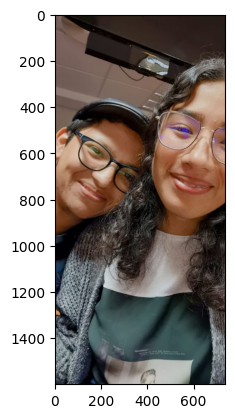

In [8]:
img = cv2.cvtColor(cv2.imread("../../data/ow.jpeg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

0 {'P': array([6.84498082e+02, 6.02526909e+02, 2.61041673e+02, 2.52104482e+02,
       1.16314398e+02, 7.05866254e+01, 5.11963546e-01]), 'nIt': 234, 'fun': 272296288, 'nFev': 14100}


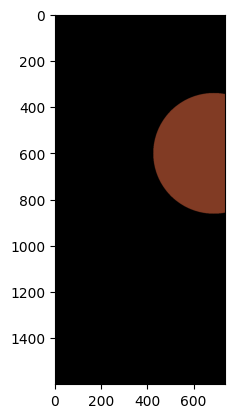

2 {'P': array([1.00961832e+02, 1.55249643e+03, 4.83407782e+02, 5.13223961e+01,
       1.15532213e+02, 1.05861020e+02, 4.22731722e-01]), 'nIt': 320, 'fun': 248806671, 'nFev': 19260}


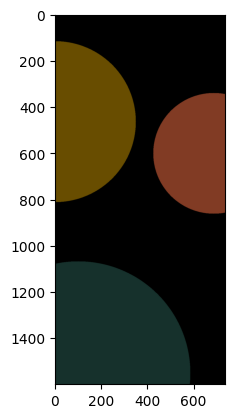

4 {'P': array([4.79998471e+02, 1.11635891e+03, 1.02105940e+02, 2.54677200e+02,
       2.25019397e+02, 2.09765273e+02, 4.58247848e-01]), 'nIt': 205, 'fun': 235394855, 'nFev': 12360}


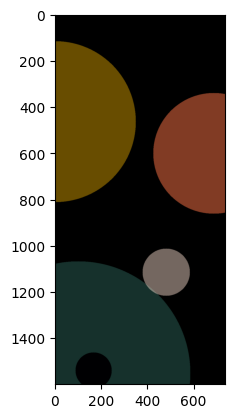

6 {'P': array([4.87028689e+02, 1.58121950e+03, 9.55050491e+01, 2.52555254e+02,
       2.43315666e+02, 2.36360590e+02, 6.60099005e-01]), 'nIt': 175, 'fun': 225691769, 'nFev': 10560}


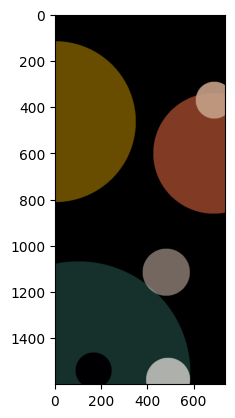

8 {'P': array([5.86350850e+02, 5.32318598e-01, 2.04263321e+02, 1.07717712e+02,
       7.43094287e+01, 6.39545548e+01, 3.46664844e-01]), 'nIt': 196, 'fun': 218708557, 'nFev': 11820}


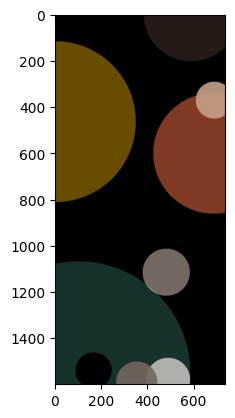

10 {'P': array([  0.        , 258.83011138, 200.35119866, 105.03313865,
        97.88013301, 254.95508373,   0.3       ]), 'nIt': 199, 'fun': 213251953, 'nFev': 12000}


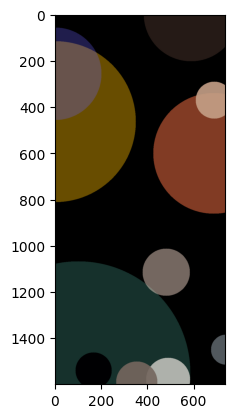

12 {'P': array([376.95830059, 349.75829785,  91.29185858, 110.36474365,
        97.58469475,  83.15220504,   0.90144302]), 'nIt': 269, 'fun': 204486856, 'nFev': 16200}


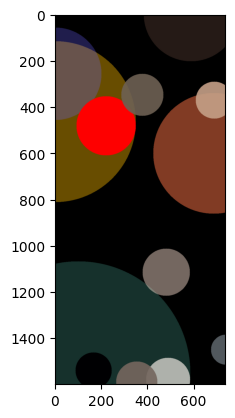

14 {'P': array([5.31390050e+02, 9.46494309e+02, 8.01197033e+01, 2.54877972e+02,
       1.28895439e+02, 3.73702158e+01, 3.27339447e-01]), 'nIt': 256, 'fun': 200611507, 'nFev': 15420}


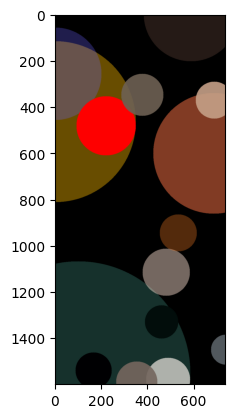

16 {'P': array([4.98263221e+01, 5.89124003e+02, 6.46344184e+01, 2.46165552e+02,
       2.34832408e+02, 2.20318343e+02, 5.38287137e-01]), 'nIt': 240, 'fun': 193903631, 'nFev': 14460}


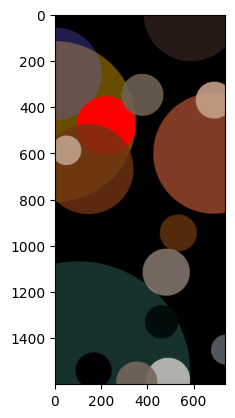

18 {'P': array([0.00000000e+00, 1.15433296e+03, 5.71160511e+01, 0.00000000e+00,
       4.62025217e+00, 2.24286182e+01, 1.00000000e+00]), 'nIt': 148, 'fun': 191977541, 'nFev': 8940}


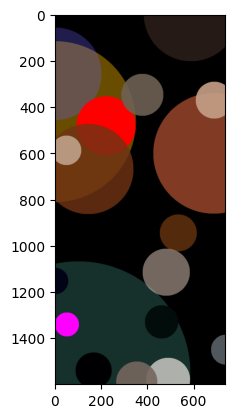

20 {'P': array([7.37000000e+02, 1.55820952e+03, 6.62470544e+01, 7.62145647e+01,
       8.14755279e+01, 9.26815670e+01, 6.74958753e-01]), 'nIt': 303, 'fun': 190416342, 'nFev': 18240}


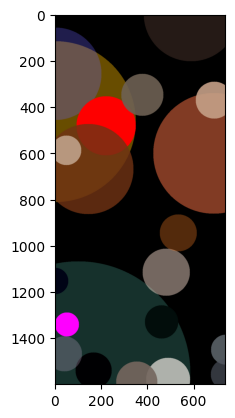

22 {'P': array([3.15813130e+02, 7.09459212e+02, 6.87287513e+01, 1.50536400e+01,
       4.87322374e-03, 0.00000000e+00, 9.96865047e-01]), 'nIt': 167, 'fun': 187005743, 'nFev': 10080}


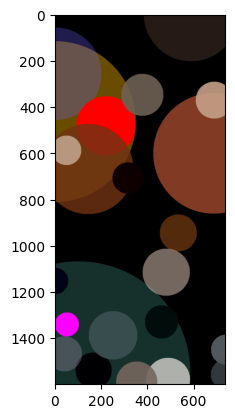

24 {'P': array([  0.        ,  57.79608773,  62.17310724, 239.86313733,
       179.51575102,  54.75516058,   0.30002088]), 'nIt': 140, 'fun': 185317569, 'nFev': 8460}


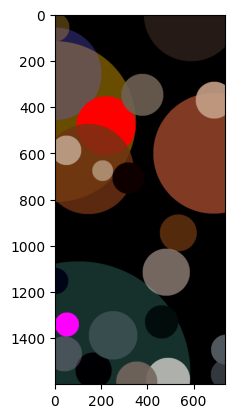

26 {'P': array([353.36317426,   0.        , 117.48753483,  42.2802176 ,
        29.28452219,  23.11348915,   0.99394357]), 'nIt': 504, 'fun': 182615064, 'nFev': 30300}


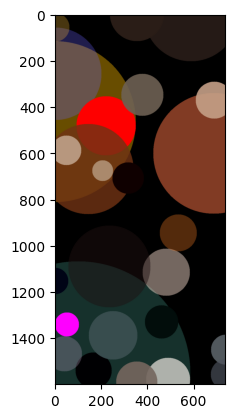

28 {'P': array([7.37000000e+02, 9.73108368e+02, 1.46888732e+02, 5.52673417e-03,
       0.00000000e+00, 2.54985106e+02, 9.99825925e-01]), 'nIt': 127, 'fun': 181462678, 'nFev': 7680}


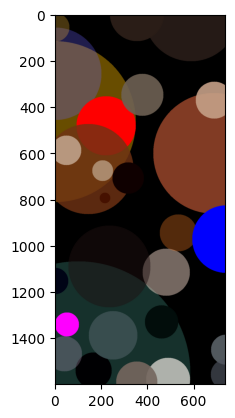

30 {'P': array([5.44203936e+02, 7.01947655e+02, 6.72001239e+01, 9.45713032e+01,
       2.65637640e+01, 7.51807167e-03, 4.17745944e-01]), 'nIt': 159, 'fun': 179121403, 'nFev': 9600}


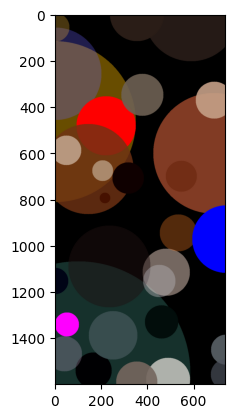

32 {'P': array([6.28833210e+02, 5.82436818e+02, 7.04715795e+01, 2.28876380e+02,
       2.37954767e+02, 2.17991090e+02, 3.08617894e-01]), 'nIt': 237, 'fun': 176703174, 'nFev': 14280}


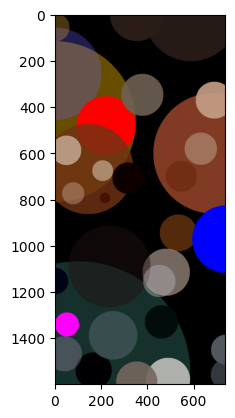

34 {'P': array([1.86467884e+02, 1.21322443e+03, 3.47162182e+01, 2.06520391e-04,
       2.54972891e+02, 4.22166272e+00, 9.99983230e-01]), 'nIt': 167, 'fun': 174985475, 'nFev': 10080}


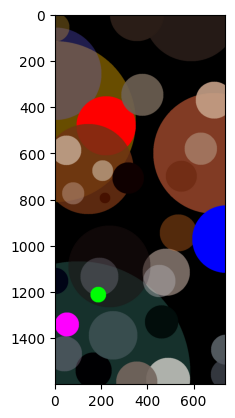

36 {'P': array([5.37361696e+02, 1.44119863e+03, 1.11140054e+02, 1.06665064e+02,
       1.43298708e+02, 1.53310442e+02, 3.00000000e-01]), 'nIt': 246, 'fun': 171222739, 'nFev': 14820}


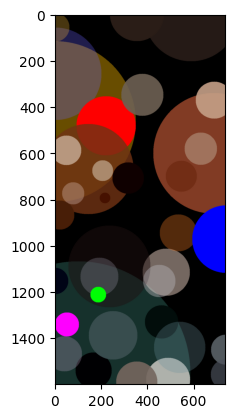

38 {'P': array([3.65184547e+02, 1.18740485e+03, 3.87930573e+01, 1.54847093e+02,
       1.30869195e+02, 1.20759670e+02, 6.16211193e-01]), 'nIt': 339, 'fun': 169968235, 'nFev': 20400}


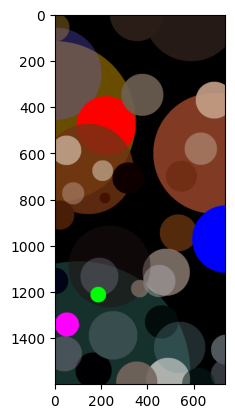

40 {'P': array([222.10251988, 296.47808634,  87.69569123, 110.68722859,
        90.70301043,  81.2307081 ,   0.99136669]), 'nIt': 398, 'fun': 167000378, 'nFev': 23940}


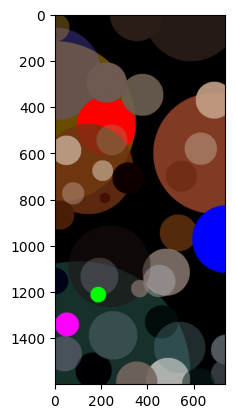

42 {'P': array([2.43607393e+02, 1.15640938e+03, 3.50893177e+01, 2.54075693e+02,
       2.54982299e+02, 2.54995960e+02, 5.06339716e-01]), 'nIt': 246, 'fun': 165278140, 'nFev': 14820}


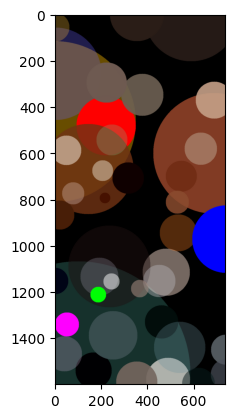

44 {'P': array([4.22874373e+02, 2.14910045e+02, 3.70914490e+01, 2.47878786e+02,
       2.36003814e+02, 2.08512656e+02, 3.84733129e-01]), 'nIt': 228, 'fun': 163737049, 'nFev': 13740}


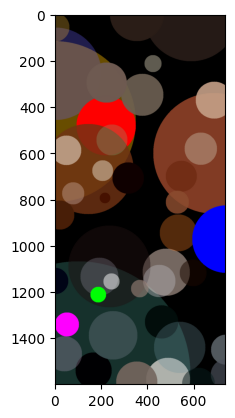

46 {'P': array([4.94766984e+02, 5.53295915e+02, 4.35432886e+01, 2.54724404e+02,
       2.30606039e+02, 1.96916615e+02, 4.41668631e-01]), 'nIt': 227, 'fun': 162388078, 'nFev': 13680}


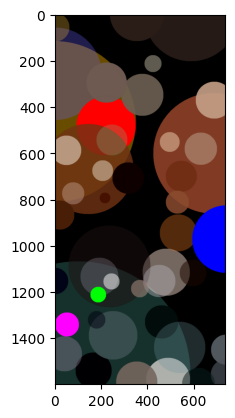

48 {'P': array([3.05123700e+02, 1.60000000e+03, 4.15846606e+01, 2.51136505e+02,
       2.42684902e+02, 2.54877893e+02, 3.01303415e-01]), 'nIt': 106, 'fun': 161451071, 'nFev': 6420}


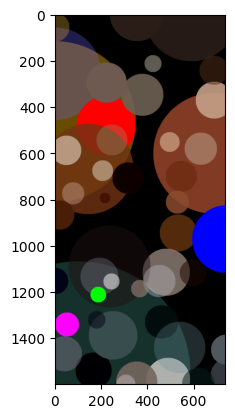

50 {'P': array([7.37000000e+02, 1.24326942e+03, 8.61452932e+01, 5.71733019e+01,
       2.99357140e+01, 2.36957907e+01, 4.09645221e-01]), 'nIt': 252, 'fun': 159546152, 'nFev': 15180}


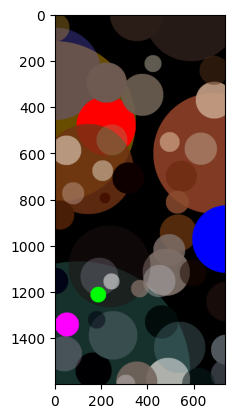

52 {'P': array([6.72929239e+01, 1.23197219e+03, 6.03725730e+01, 1.51868020e+02,
       1.48108493e+02, 1.57264101e+02, 3.68487205e-01]), 'nIt': 384, 'fun': 158654624, 'nFev': 23100}


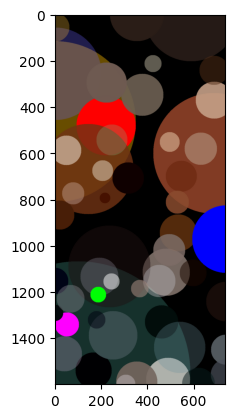

54 {'P': array([3.10764699e+02, 1.22445430e+03, 2.92607008e+01, 1.69778093e+00,
       3.04712737e+00, 3.83968975e-02, 3.71913233e-01]), 'nIt': 182, 'fun': 157671342, 'nFev': 10980}


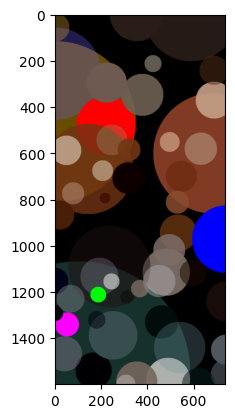

56 {'P': array([2.98372781e+01, 1.60000000e+03, 3.05774057e+01, 2.33436156e-01,
       1.11057258e+00, 8.66019381e+00, 9.99779015e-01]), 'nIt': 111, 'fun': 157054947, 'nFev': 6720}


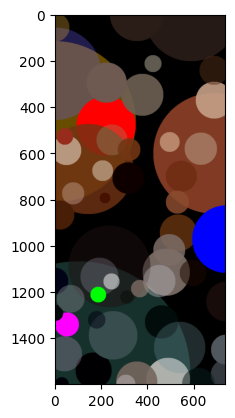

58 {'P': array([ 91.34013006, 494.7874503 ,  41.18762124,  21.7343089 ,
        23.06861603,  22.04989034,   0.85956998]), 'nIt': 336, 'fun': 155855294, 'nFev': 20220}


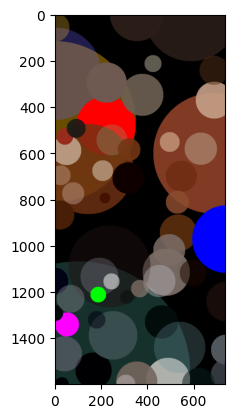

60 {'P': array([5.92789315e+02, 2.58536397e+02, 2.82272552e+01, 2.16647691e+02,
       2.42253349e+02, 2.24775746e+02, 3.83095875e-01]), 'nIt': 280, 'fun': 154989228, 'nFev': 16860}


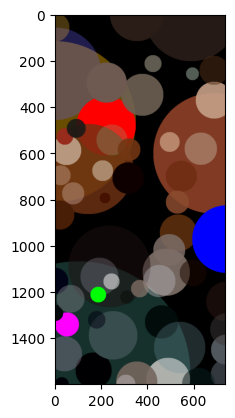

62 {'P': array([4.09354826e+02, 1.40141094e+03, 3.13462508e+01, 6.25148656e+00,
       1.79536338e+01, 2.27682282e+01, 7.58673876e-01]), 'nIt': 389, 'fun': 153962747, 'nFev': 23400}


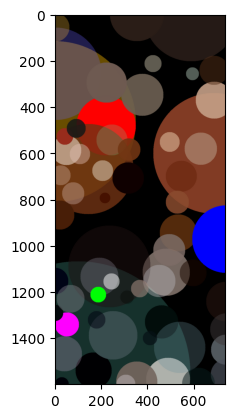

64 {'P': array([7.19383864e+02, 6.16546626e+02, 2.73195495e+01, 2.45425835e+02,
       2.54051422e+02, 2.34607910e+02, 3.74219035e-01]), 'nIt': 269, 'fun': 153627363, 'nFev': 16200}


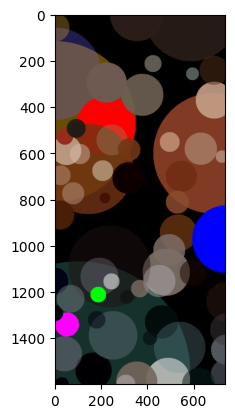

66 {'P': array([4.80236064e+02, 7.51847225e+02, 4.22911388e+01, 1.60729753e+02,
       1.08379966e+02, 5.97502059e+01, 6.06360930e-01]), 'nIt': 396, 'fun': 152572429, 'nFev': 23820}


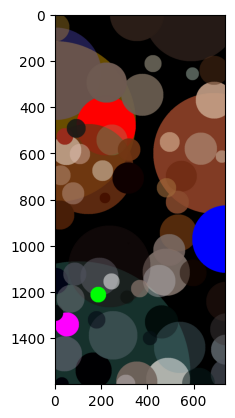

68 {'P': array([1.65824564e+02, 5.30264765e+02, 3.20182266e+01, 2.34703738e+02,
       2.54999886e+02, 2.34518729e+02, 4.81381669e-01]), 'nIt': 238, 'fun': 151325961, 'nFev': 14340}


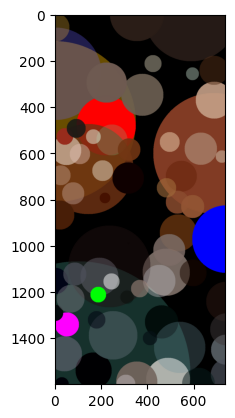

70 {'P': array([2.46526779e+02, 1.58249135e+03, 2.16122943e+01, 1.43373011e+02,
       1.22607826e+02, 1.22845205e+02, 8.01482823e-01]), 'nIt': 440, 'fun': 150130185, 'nFev': 26460}


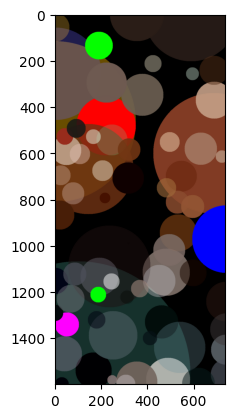

72 {'P': array([3.72169053e+02, 1.31990644e+03, 6.30988746e+01, 8.38760488e+01,
       1.13763680e+02, 1.22096490e+02, 3.03465292e-01]), 'nIt': 285, 'fun': 149340939, 'nFev': 17160}


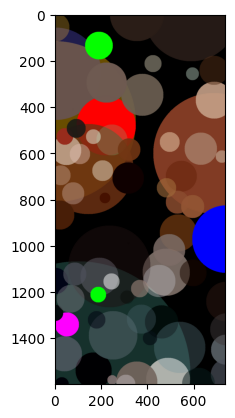

74 {'P': array([3.00869415e+02, 1.18172327e+03, 2.85220107e+01, 2.54853137e+02,
       2.18779336e+02, 1.97555058e+02, 3.68057683e-01]), 'nIt': 457, 'fun': 148297706, 'nFev': 27480}


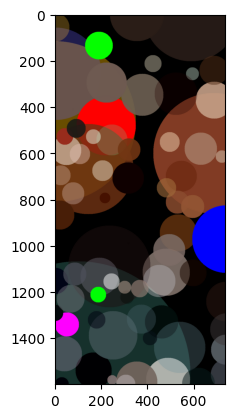

76 {'P': array([ 45.82712558, 413.19937243,  53.73312487,  86.79757796,
        67.7791366 ,  56.05656357,   0.45464473]), 'nIt': 365, 'fun': 147641647, 'nFev': 21960}


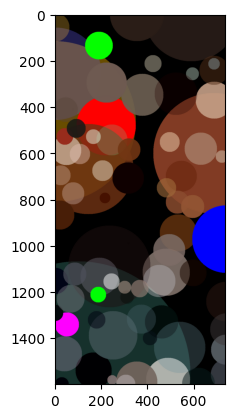

78 {'P': array([1.43186172e+02, 1.45052264e+03, 2.29494605e+01, 2.02358609e-01,
       9.09520706e+00, 1.62511283e+01, 9.77647126e-01]), 'nIt': 231, 'fun': 146876744, 'nFev': 13920}


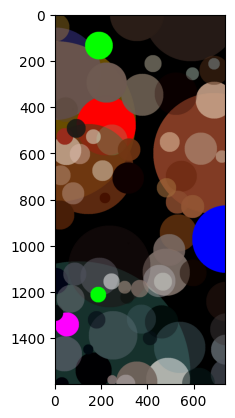

80 {'P': array([6.33198418e+02, 1.35408201e+03, 4.54542355e+01, 9.24284198e+00,
       2.26401942e+01, 3.12593604e+01, 3.09413174e-01]), 'nIt': 272, 'fun': 146627975, 'nFev': 16380}


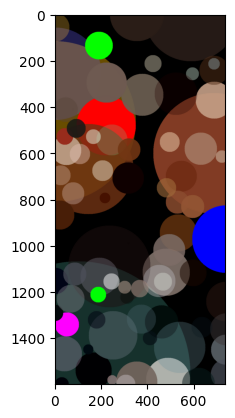

82 {'P': array([3.14006333e+02, 1.00624142e+03, 3.56437364e+01, 2.75051969e+00,
       0.00000000e+00, 2.77526607e-01, 9.87928034e-01]), 'nIt': 234, 'fun': 146120323, 'nFev': 14100}


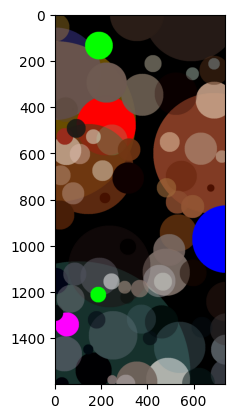

84 {'P': array([ 96.77418011,  92.65976042,  40.67239125, 216.87849457,
       158.89387374,  73.83372828,   0.43051985]), 'nIt': 339, 'fun': 145324223, 'nFev': 20400}


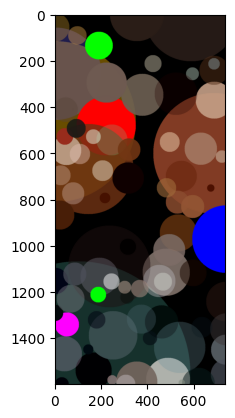

86 {'P': array([7.26345732e+02, 5.52464326e+02, 1.62183580e+01, 2.19961217e+01,
       6.65774941e+00, 2.70137153e+01, 5.55678731e-01]), 'nIt': 214, 'fun': 145167214, 'nFev': 12900}


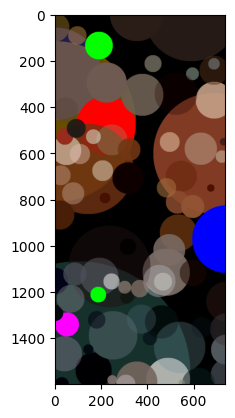

88 {'P': array([1.19954975e-01, 3.06640631e+01, 2.90495712e+01, 1.90423370e+02,
       1.64193998e+02, 2.31270748e+02, 3.00000000e-01]), 'nIt': 180, 'fun': 144718751, 'nFev': 10860}


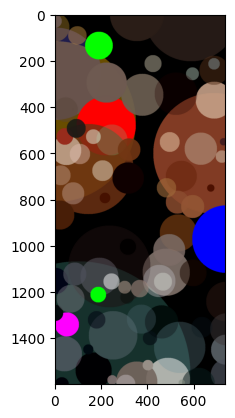

90 {'P': array([2.62419491e+02, 1.50783911e+03, 4.54859332e+01, 4.29692747e+01,
       4.57345973e+01, 4.92803364e+01, 6.94652684e-01]), 'nIt': 325, 'fun': 144300036, 'nFev': 19560}


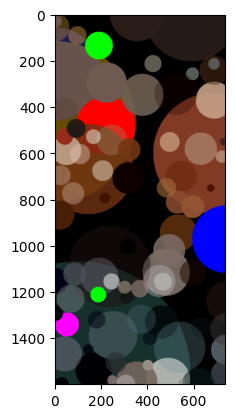

92 {'P': array([4.13592568e+01, 1.07420550e+03, 1.00000000e+00, 1.42657809e+01,
       7.25123160e+00, 3.79553706e+01, 4.61826955e-01]), 'nIt': 241, 'fun': 144005634, 'nFev': 14520}


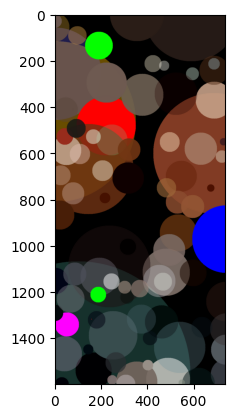

94 {'P': array([4.81624357e+02, 3.17804043e+02, 2.06085496e+01, 2.54018846e+02,
       2.28034046e+02, 2.02952486e+02, 4.05478546e-01]), 'nIt': 390, 'fun': 143300251, 'nFev': 23460}


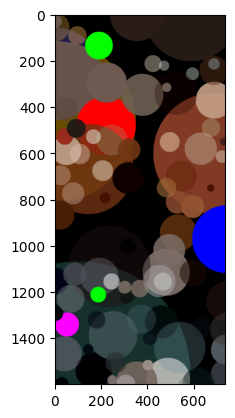

96 {'P': array([5.49520496e+02, 1.53368795e+03, 3.75649767e+01, 1.80948576e+02,
       1.87080524e+02, 1.78025160e+02, 8.77450690e-01]), 'nIt': 325, 'fun': 142506401, 'nFev': 19560}


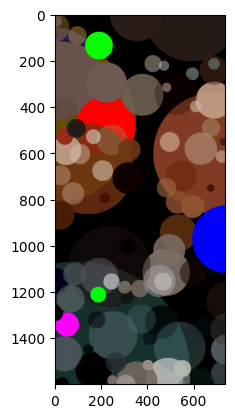

98 {'P': array([4.17677488e+02, 1.20134081e+03, 2.67280180e+01, 1.68722161e+02,
       1.61474247e+02, 1.57743016e+02, 9.87021654e-01]), 'nIt': 310, 'fun': 142012891, 'nFev': 18660}


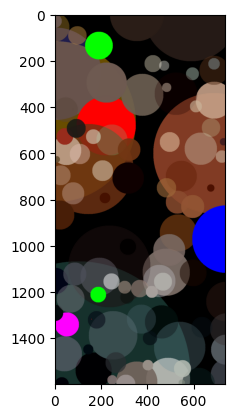

100 {'P': array([2.12872705e+02, 1.00218770e+03, 6.55195999e+01, 5.41054731e+01,
       3.81763638e+01, 2.91297769e+01, 4.80201975e-01]), 'nIt': 369, 'fun': 141669414, 'nFev': 22200}


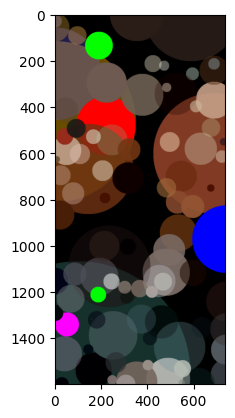

102 {'P': array([2.43057839e+02, 1.10522881e+03, 2.51203075e+01, 1.45984472e+02,
       1.47690795e+02, 1.51153399e+02, 8.11514589e-01]), 'nIt': 340, 'fun': 141162668, 'nFev': 20460}


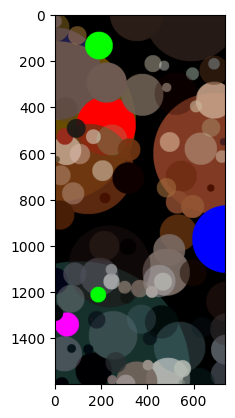

104 {'P': array([3.52306991e+01, 7.37662483e+02, 1.00000000e+00, 1.36488218e+02,
       7.57513911e+01, 4.44246540e+01, 3.42318979e-01]), 'nIt': 345, 'fun': 140837692, 'nFev': 20760}


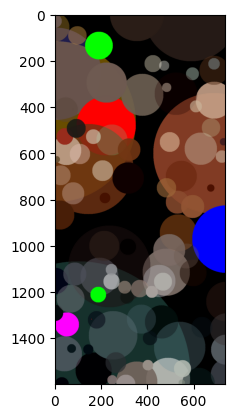

106 {'P': array([1.14015194e+02, 8.08239869e+02, 6.13275796e+01, 1.71494708e+02,
       1.02820574e+02, 6.62132321e+01, 3.25873606e-01]), 'nIt': 252, 'fun': 140313021, 'nFev': 15180}


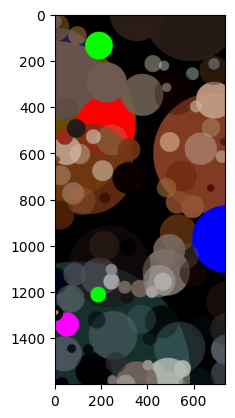

108 {'P': array([7.37000000e+02, 1.19057271e+03, 4.16114397e+01, 1.06619141e+02,
       9.65127196e+01, 9.47875678e+01, 3.03685878e-01]), 'nIt': 287, 'fun': 140133190, 'nFev': 17280}


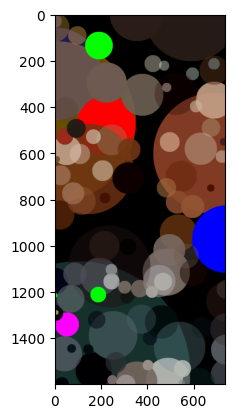

110 {'P': array([4.31187498e+02, 6.18784472e+02, 1.00000000e+00, 6.68032747e+01,
       4.55870192e+01, 0.00000000e+00, 3.01776117e-01]), 'nIt': 376, 'fun': 139893147, 'nFev': 22620}


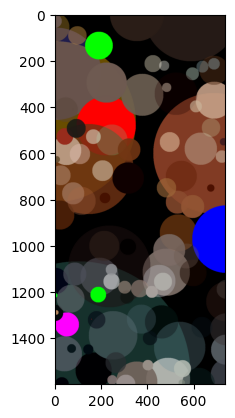

112 {'P': array([2.88034289e+02, 7.28174392e+02, 2.73976203e+01, 2.31138160e+02,
       1.38657606e+02, 4.82436446e+01, 3.26160549e-01]), 'nIt': 315, 'fun': 139505703, 'nFev': 18960}


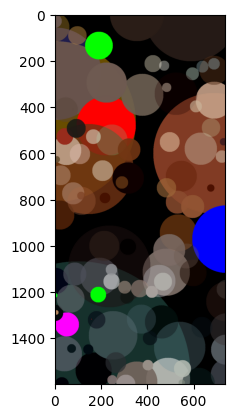

114 {'P': array([6.17538865e+02, 6.03745514e+02, 2.92415049e+01, 2.54864693e+02,
       2.32336362e+02, 2.05296404e+02, 4.29145171e-01]), 'nIt': 211, 'fun': 139163840, 'nFev': 12720}


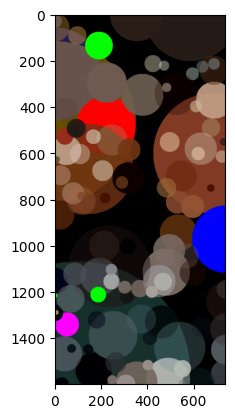

In [9]:
cR = 0.85
executeOurs(img, objective_function, bounds, nIter + 700, cR, popSize + 10, nMax, True, 700, acceptAll=True)

In [ ]:
executeTheirs(img, objective_function, bounds, nIter + 700, cR, popSize + 10, nMax, False, nIter + 700, acceptAll=True)

KeyboardInterrupt: 